# Aula 3.1(2): Classificação: Dataset Titanic
Objetivo: Prever se um passageiro sobreviveu ao naufrágio do Titanic (classificação binária)

Passos:
1. Carregamento e Exploração dos Dados.
2. Pré-processamento: tratar valores ausentes (missing values); codificar variáveis categóricas; criar novas features (feature engineering).
3. Treinamento de Modelos: modelo base: Regressão Logística; modelos avançados: Random Forest e Gradient Boosting.
4. Ajuste de Hiperparâmetros: usar GridSearchCV para otimizar o Random Forest.
5. Ensemble Learning: combinar previsões com VotingClassifier.
6. Avaliação e Visualização: matriz de confusão e métricas detalhadas.

## Roteiro de execução

1. Carregamento e Exploração dos Dados

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Valores ausentes no df:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64



Text(0.5, 1.0, 'Distribuição das especies')

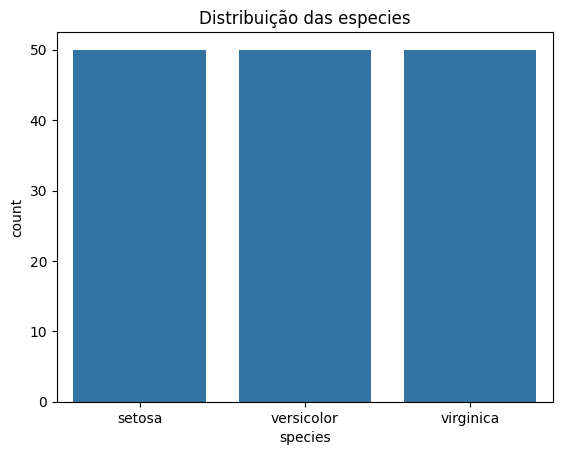

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')

# Visualizar as primeiras linhas
print(df.head())

# Resumo básico
print(df.info())

print()
print("Valores ausentes no df:\n", df.isna().sum())
print()

#Visualizar distribuição da variável alvo
sns.countplot(x='species', data=df)
plt.title('Distribuição das especies')

2. Pré-processamento
- Tratar valores ausentes (missing values).
- Codificar variáveis categóricas.
- Criar novas features (feature engineering).

In [24]:
# Selecionar features e alvo
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

3. Treinamento de Modelos
- Modelo base: Regressão Logística.
- Modelos avançados: Random Forest e Gradient Boosting.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Validação Cruzada para cada um dos modelos antes do treinamento")
# Validação cruzada para Regressão Logística
cv_scores_lr = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5, scoring='accuracy')
print("\nAcurácia Regressão Logística (CV): {:.2f} ± {:.2f}".format(np.mean(cv_scores_lr), np.std(cv_scores_lr)))

# Validação cruzada para Random Forest
cv_scores_rf = cross_val_score(RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42), X_train, y_train, cv=5, scoring='accuracy')
print("Acurácia Random Forest (CV): {:.2f} ± {:.2f}".format(np.mean(cv_scores_rf), np.std(cv_scores_rf)))

# Validação cruzada para Gradient Boosting
cv_scores_gb = cross_val_score(GradientBoostingClassifier(n_estimators=100, random_state=42), X_train, y_train, cv=5, scoring='accuracy')
print("Acurácia Gradient Boosting (CV): {:.2f} ± {:.2f}".format(np.mean(cv_scores_gb), np.std(cv_scores_gb)))

# Modelo base: Regressão Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("\nAcurácia Regressão Logística:", accuracy_score(y_test, y_pred_log))

# Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_rf))

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Acurácia Gradient Boosting:", accuracy_score(y_test, y_pred_gb))

Validação Cruzada para cada um dos modelos antes do treinamento

Acurácia Regressão Logística (CV): 0.97 ± 0.05
Acurácia Random Forest (CV): 0.95 ± 0.06
Acurácia Gradient Boosting (CV): 0.94 ± 0.06

Acurácia Regressão Logística: 1.0
Acurácia Random Forest: 1.0
Acurácia Gradient Boosting: 1.0


4. Ajuste de Hiperparâmetros
- Usar GridSearchCV para otimizar o Random Forest.

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)

Melhores parâmetros: {'max_depth': None, 'n_estimators': 200}
Melhor acurácia: 0.95


5. Ensemble Learning
- Combinar previsões com VotingClassifier.

In [27]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('lr', log_reg)],
    voting='hard'
)
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
print("Acurácia Voting Classifier:", accuracy_score(y_test, y_pred_voting))

Acurácia Voting Classifier: 1.0


6. Avaliação e Visualização
- Matriz de confusão e métricas detalhadas.

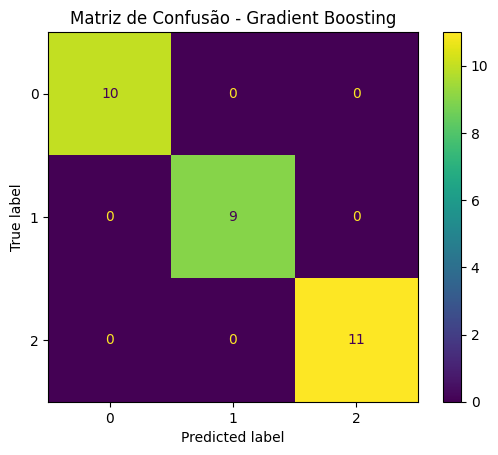

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de Confusão - Gradient Boosting')
plt.show()

print(classification_report(y_test, y_pred_gb))

## Exercício

### Exercício complementar opcional
Aplique o mesmo processo a outro dataset de classificação, como o Iris (`sns.load_dataset('iris')`).

Utilizando o dataset Iris no primeiro momento, todos os modelos apresentaram uma acurácia de 100%, o que me surpreendeu. Então, decidi aplicar a validação cruzada com 5 folds para cada modelo antes do treinamento propriamente dito. Depois de separar os dados de treino e teste, o resultado para cada modelo foi:
Acurácia Regressão Logística (CV): 0,97 ± 0,05
Acurácia Random Forest (CV): 0,95 ± 0,06
Acurácia Gradient Boosting (CV): 0,94 ± 0,06
Isso indica que o modelo de regressão logística foi o que teve melhor desempenho, com média de 0,97 e desvio padrão de 0,05, demonstrando sua consistência nesses testes de validação cruzada. Esse resultado não difere muito da acurácia obtida no conjunto de teste depois do treinamento, que foi de 100%, o que reforça que se trata de um modelo consistente e com boa capacidade para classificar essas espécies de plantas.